In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look better
sns.set(style='whitegrid')


In [2]:
import os
print(os.getcwd())


c:\Users\Naga Varshini\OneDrive\Desktop\Netflix_Data_Analysis\notebooks


In [3]:
df = pd.read_csv(r"c:\Users\Naga Varshini\OneDrive\Desktop\Netflix_Data_Analysis\data\netflix_titles.csv")


In [4]:
df.shape


(8807, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum() 

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.describe() 

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


C:\Users\Naga Varshini\AppData\Local\Temp\ipykernel_20336\4003298204.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


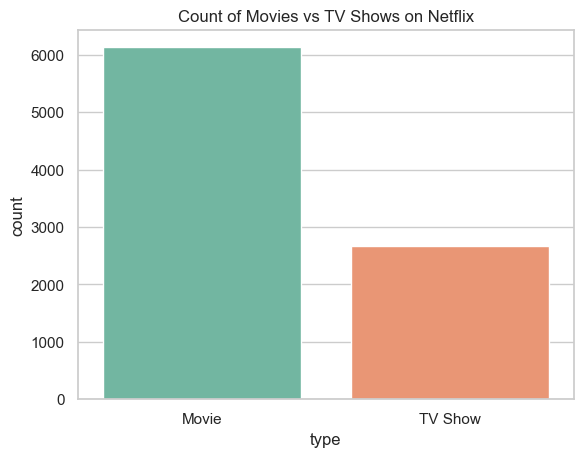

In [8]:
sns.countplot(data=df, x='type', palette='Set2')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.show()


C:\Users\Naga Varshini\AppData\Local\Temp\ipykernel_20336\398344778.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')


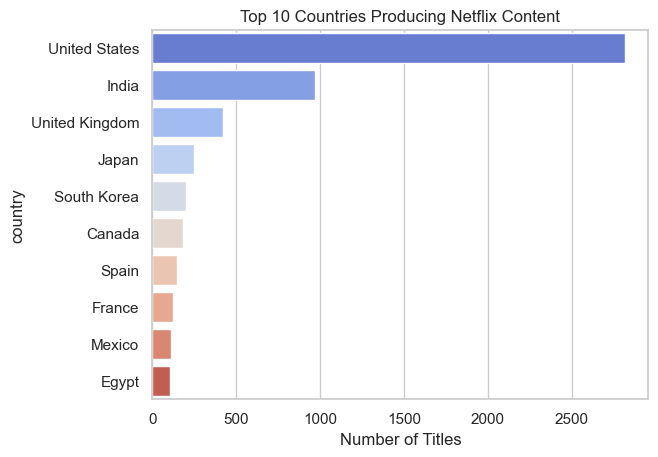

In [9]:
top_countries = df['country'].value_counts().head(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette='coolwarm')
plt.title('Top 10 Countries Producing Netflix Content')
plt.xlabel('Number of Titles')
plt.show()


In [10]:
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year
yearly = df['year_added'].value_counts().sort_index()


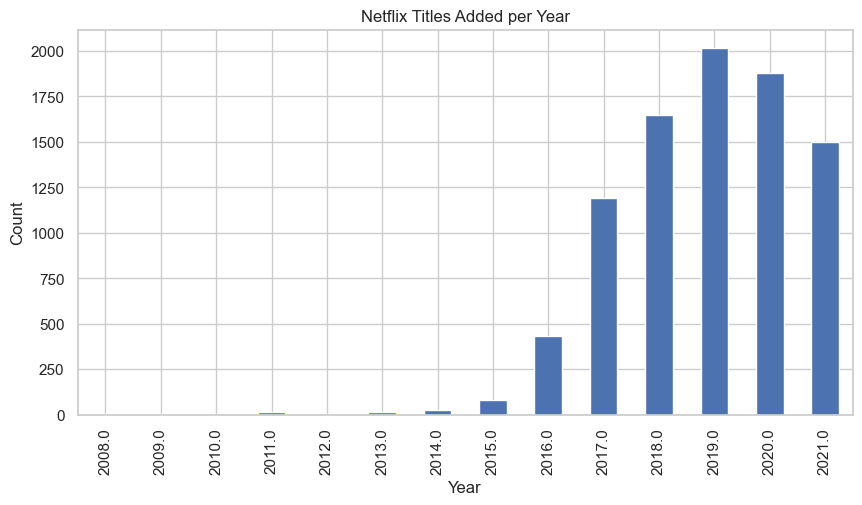

In [11]:
import matplotlib.pyplot as plt

yearly.plot(kind='bar', figsize=(10,5))
plt.title("Netflix Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()


C:\Users\Naga Varshini\AppData\Local\Temp\ipykernel_20336\1528183346.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')


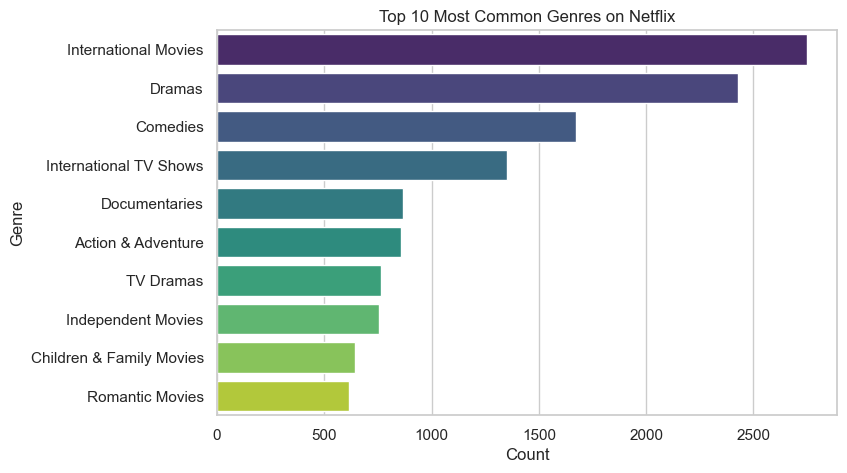

In [12]:
# Split 'listed_in' column by comma and count
from collections import Counter

genres = df['listed_in'].dropna().apply(lambda x: x.split(', '))
genre_count = Counter([g for sublist in genres for g in sublist])

top_genres = pd.DataFrame(genre_count.most_common(10), columns=['Genre', 'Count'])

plt.figure(figsize=(8,5))
sns.barplot(data=top_genres, x='Count', y='Genre', palette='viridis')
plt.title('Top 10 Most Common Genres on Netflix')
plt.show()


C:\Users\Naga Varshini\AppData\Local\Temp\ipykernel_20336\669664941.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')


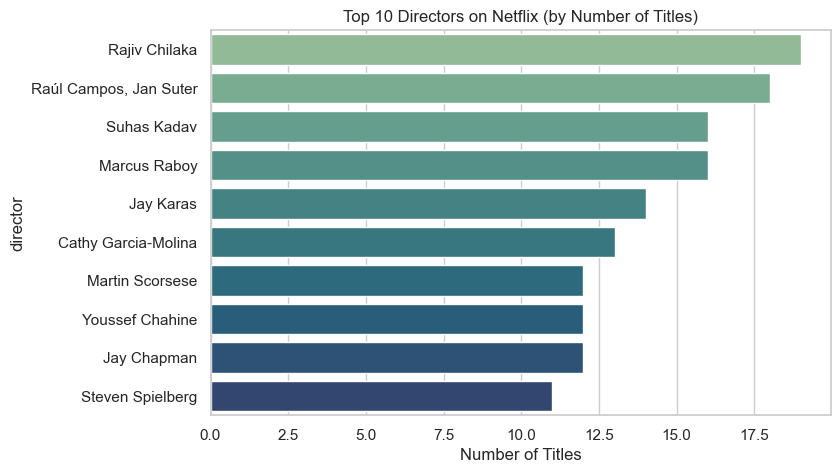

In [13]:
top_directors = df['director'].value_counts().head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='crest')
plt.title('Top 10 Directors on Netflix (by Number of Titles)')
plt.xlabel('Number of Titles')
plt.show()


C:\Users\Naga Varshini\AppData\Local\Temp\ipykernel_20336\1505041876.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='magma')


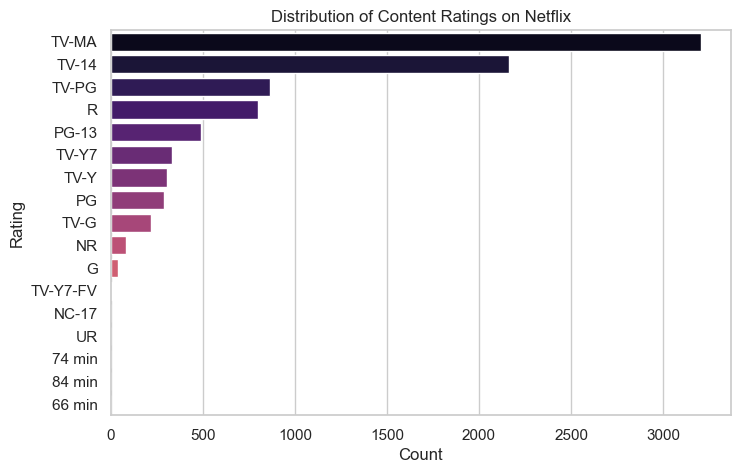

In [14]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index, palette='magma')
plt.title('Distribution of Content Ratings on Netflix')
plt.xlabel('Count')
plt.ylabel('Rating')
plt.show()


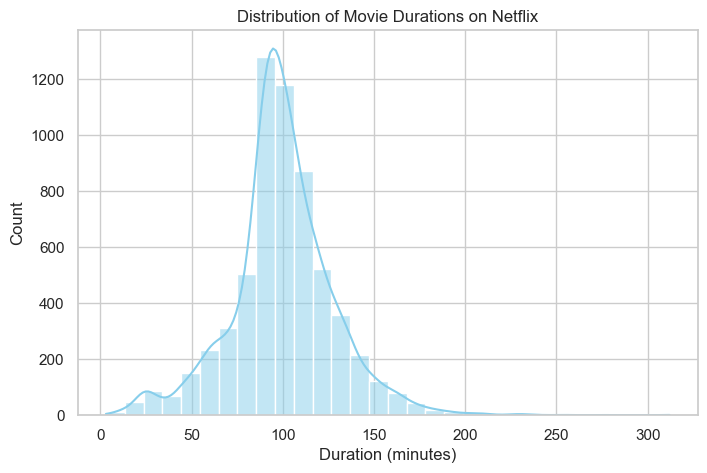

In [15]:
movie_durations = df[df['type'] == 'Movie']['duration'].dropna().apply(lambda x: int(x.split()[0]))
plt.figure(figsize=(8,5))
sns.histplot(movie_durations, bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations on Netflix')
plt.xlabel('Duration (minutes)')
plt.ylabel('Count')
plt.show()


C:\Users\Naga Varshini\AppData\Local\Temp\ipykernel_20336\3005843243.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()), palette='cool')


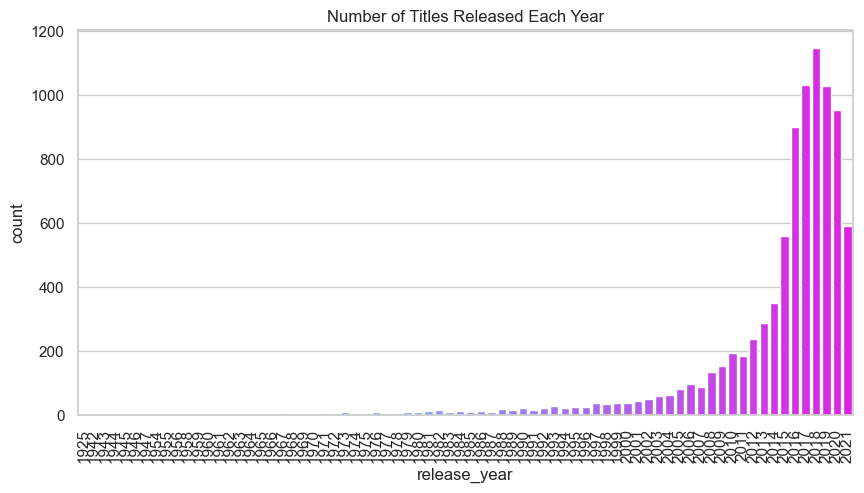

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='release_year', order=sorted(df['release_year'].unique()), palette='cool')
plt.title('Number of Titles Released Each Year')
plt.xticks(rotation=90)
plt.show()


In [17]:
df['type'].value_counts()


type
Movie      6131
TV Show    2676
Name: count, dtype: int64

In [18]:
tv_shows_count = df[df['type'] == 'TV Show'].shape[0]
print("Total TV Shows:", tv_shows_count)


Total TV Shows: 2676


In [19]:
counts = df['type'].value_counts(normalize=True) * 100
print(counts)


type
Movie      69.615079
TV Show    30.384921
Name: proportion, dtype: float64


In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Netflix dataset
df = pd.read_csv('../data/netflix_titles.csv')

# Convert date_added to datetime and extract year
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

# Filter between 2000 and 2025
df_year = df[(df['year_added'] >= 2000) & (df['year_added'] <= 2025)]

# Count how many titles added per year
yearly_counts = df_year['year_added'].value_counts().sort_index()

# Print yearly counts
print(yearly_counts)


year_added
2008.0       2
2009.0       2
2010.0       1
2011.0      13
2012.0       3
2013.0      10
2014.0      23
2015.0      73
2016.0     418
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
Name: count, dtype: int64


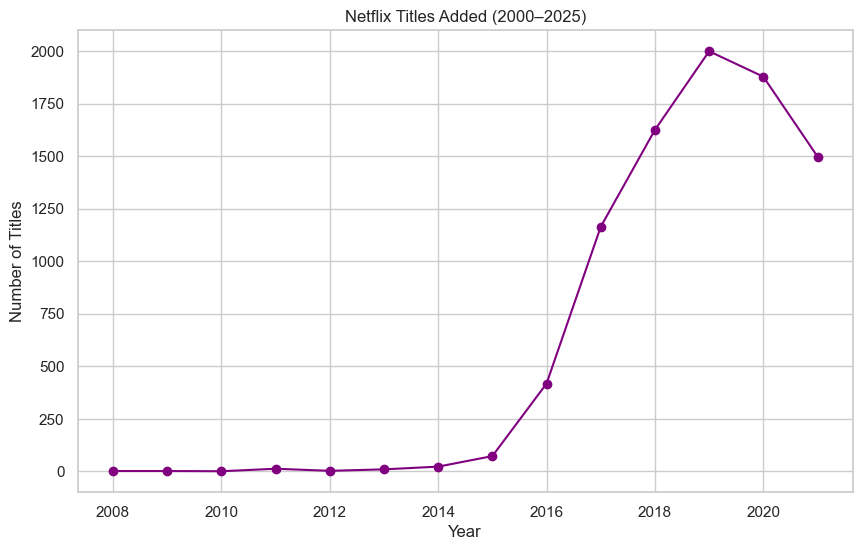

In [21]:
plt.figure(figsize=(10,6))
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='purple')
plt.title('Netflix Titles Added (2000–2025)')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.show()


In [22]:
import pandas as pd

# Change this path if your CSV is in another folder
df = pd.read_csv("C:/Users/Naga Varshini/OneDrive/Desktop/Netflix_Data_Analysis/data/netflix_titles.csv")

# Optional: clean up missing values
df.dropna(subset=['country'], inplace=True)


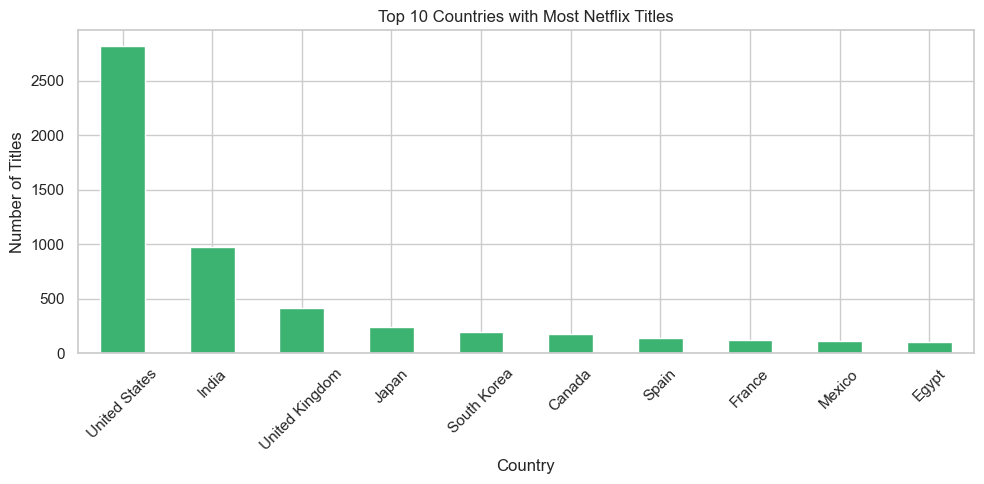

In [23]:
import matplotlib.pyplot as plt

top_countries = df['country'].value_counts().head(10)
top_countries.plot(kind='bar', figsize=(10,5), color='mediumseagreen')
plt.title("Top 10 Countries with Most Netflix Titles")
plt.xlabel("Country")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


NameError: name 'BASE_DIR' is not defined

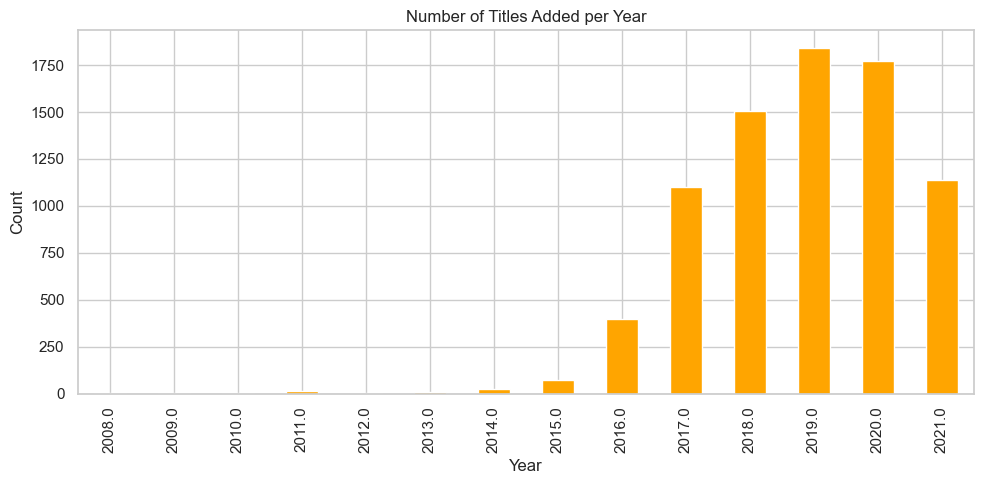

In [24]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year
yearly = df['year_added'].value_counts().sort_index()

yearly.plot(kind='bar', figsize=(10,5), color='orange')
plt.title("Number of Titles Added per Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'titles_per_year.png'))
plt.show()


NameError: name 'os' is not defined

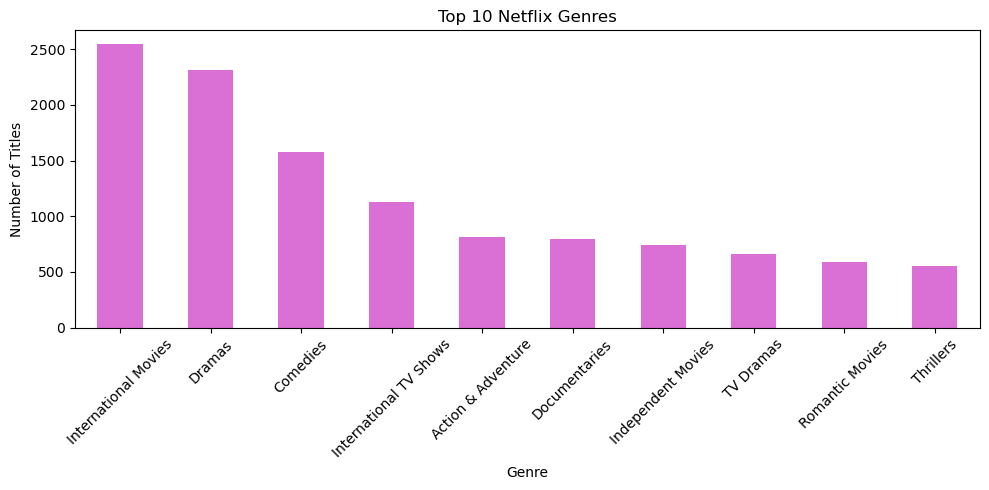

In [ ]:
from collections import Counter

genres = df['listed_in'].dropna().str.split(', ')
genre_counts = Counter([g for sublist in genres for g in sublist])
top_genres = pd.Series(dict(genre_counts)).sort_values(ascending=False).head(10)

top_genres.plot(kind='bar', figsize=(10,5), color='orchid')
plt.title("Top 10 Netflix Genres")
plt.xlabel("Genre")
plt.ylabel("Number of Titles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig(os.path.join(BASE_DIR, 'top_genres.png'))
plt.show()
